# **Problema**

Una compañía tiene dos fábricas A y B, que se encuentran en la misma zona urbana. La compañía tiene un sistema de transporte entre ambas con un solo autobús. El transporte sale de A al inicio de cada día; éste autobús arranca hacia la fábrica hasta que lo hayan abordado N personas. El tiempo de recorrido es N (31, 9) minutos. Los pasajeros llegan a la terminal de la fábrica A y B a una tasa promedio de 9 y 5 pasajeros/hora, respectivamente, ambas con distribución de Poisson. ¿Si se considera un tiempo de 5 segundos/persona para abordar, determine el valor de N que minimiza el tiempo medio de espera por persona?.


### **Distribución poisson para el número de pasajeros**
$$f\left(k,\lambda \right)=\frac{\lambda ^ke^{-\lambda }}{k!}$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#recorridos que realiza el bus
Z = 20

#pasajeros
N = Z

fig = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
#fabrica A
var_lambda = 5
pasajeros_fabrica_A = np.random.poisson(var_lambda, N) #creando muestra de datos
cuenta, cajas, ignorar = plt.hist(pasajeros_fabrica_A, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Pasajeros Fabrica A')

plt.subplot2grid((2,3),(0,1))
#Fabrica B
var_lambda = 9
pasajeros_fabrica_B = np.random.poisson(var_lambda, N) #creando muestra de datos
cuenta, cajas, ignorar = plt.hist(pasajeros_fabrica_B, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Pasajeros Fabrica B')

Text(0.5, 1.0, 'Histograma Pasajeros Fabrica B')

### **Distribución Normal para el tiempo de recorrido**

$$Z\:=\:\frac{x-\mu }{\sigma }$$

Text(0.5, 1.0, 'Histograma de tiempo')

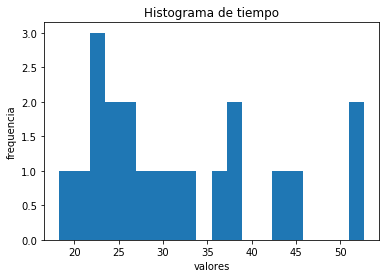

In [3]:

# Graficando histograma
mu, sigma = 31, 9 # media y desvio estandar
tiempo_recorrido = np.random.normal(mu, sigma, Z) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(tiempo_recorrido, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma de tiempo')


## Simulación

Con N pasajeros con Z recorridos del bus


In [4]:
#pasajeros
#N = 25
#recorridos que realiza el bus
#Z = 10

#todos los tiempos se manejan en segundos
data = []
t_salida = 0
t_llegada = 0

tiempo = [[],[]]
cola =[[],[]]
tiempo_espera_cola =[[],[]]

#convertir segundos en formato hora
def format_hour(segundos):
    horas=int(segundos/3600)
    segundos-=horas*3600
    minutos=int(segundos/60)
    segundos-=minutos*60
    
    if horas >= 25:
        
        rango = int(horas/24)
        horas = horas - 24*rango
        
        
    return str(horas)+":"+str(minutos)+":"+str(segundos)

def format_minute(segundos):
    #horas=int(segundos/3600)
    #segundos-=horas*3600
    minutos=int(segundos/60)
           
        
    return str(minutos)
    


#hacer la simulación para Z valores
for i in range(0,Z):
    t_espera_cola = t_llegada - t_salida
    t_salida = t_llegada
    #en segundos
    t_recorrido = int(tiempo_recorrido[i]*60)
    
    
    
    if i%2 == 0:
        t_abordaje = pasajeros_fabrica_A[i]*5
        t_llegada = t_salida + t_recorrido + t_abordaje
        
        data.append(["A",pasajeros_fabrica_A[i],format_hour(t_espera_cola),format_hour(t_salida),format_hour(t_recorrido),t_abordaje,format_hour(t_llegada)])
        #cola A
        cola[0].append(pasajeros_fabrica_A[i])
        #tiempo A
        tiempo[0].append(format_minute(t_salida))
        #tiempo cola A
        tiempo_espera_cola[0].append(format_minute(t_espera_cola))
        
    else:
        t_abordaje = pasajeros_fabrica_B[i]*5
        t_llegada = t_salida + t_recorrido + t_abordaje
        data.append(["B",pasajeros_fabrica_B[i],format_hour(t_espera_cola),format_hour(t_salida),format_hour(t_recorrido),t_abordaje,format_hour(t_llegada)])
        #cola B
        cola[1].append(pasajeros_fabrica_B[i])
        #tiempo B
        tiempo[1].append(format_minute(t_salida))
        #tiempo cola B
        tiempo_espera_cola[1].append(format_minute(t_espera_cola))
        
        
    
pd.DataFrame(data, columns=["Fabrica","Personas en la Cola","Tiempo espera en cola","Tiempo de salida","Tiempo de recorrido",
             "Tiempo de abordaje(Seg)","Tiempo de llegada"])




,Fabrica,Personas en la Cola,Tiempo espera en cola,Tiempo de salida,Tiempo de recorrido,Tiempo de abordaje(Seg),Tiempo de llegada
0,A,3,0:0:0,0:0:0,0:24:11,15,0:24:26
1,B,10,0:24:26,0:24:26,0:37:55,50,1:3:11
2,A,3,0:38:45,1:3:11,0:23:58,15,1:27:24
3,B,10,0:24:13,1:27:24,0:52:38,50,2:20:52
4,A,6,0:53:28,2:20:52,0:43:8,30,3:4:30
5,B,8,0:43:38,3:4:30,0:22:34,40,3:27:44
6,A,9,0:23:14,3:27:44,0:33:36,45,4:2:5
7,B,11,0:34:21,4:2:5,0:22:50,55,4:25:50
8,A,3,0:23:45,4:25:50,0:36:51,15,5:2:56
9,B,5,0:37:6,5:2:56,0:28:58,25,5:32:19


Text(0.5, 1.0, 'Número de clientes en la cola B esperando')

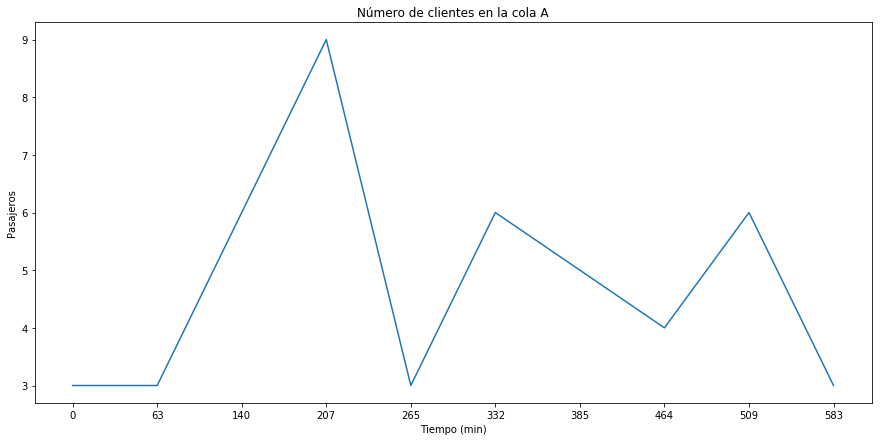

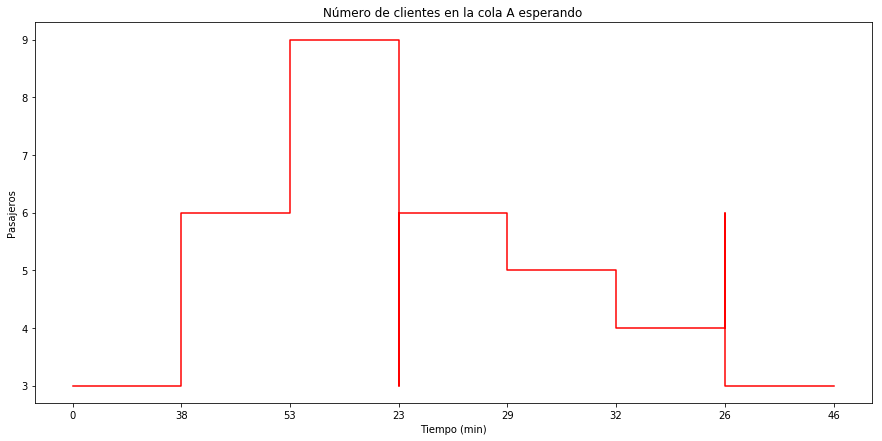

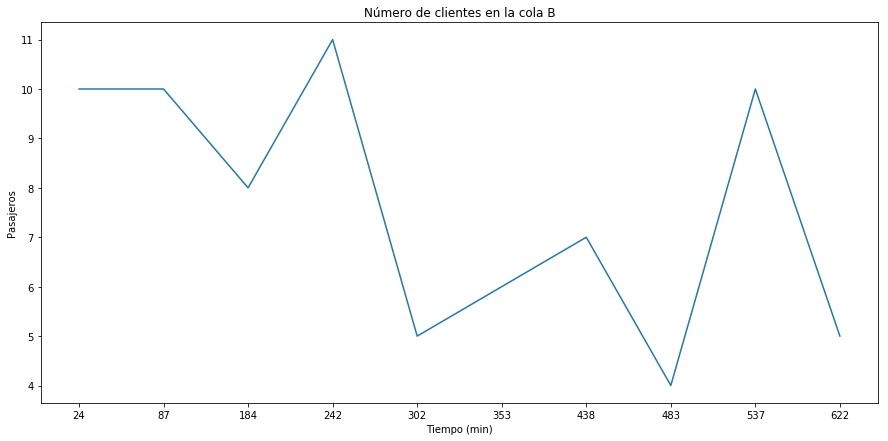

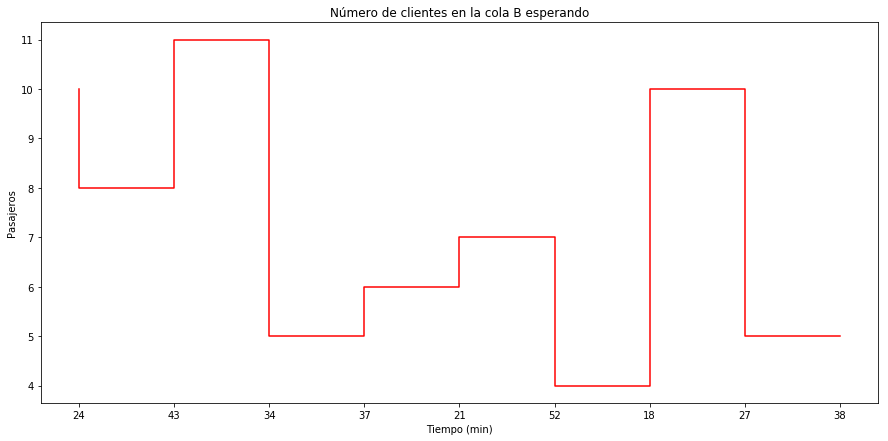

In [5]:
plt.figure(figsize=(15, 7))
plt.plot(tiempo[0], cola[0])
plt.ylabel('Pasajeros')
plt.xlabel('Tiempo (min)')
plt.title("Número de clientes en la cola A")

plt.figure(figsize=(15, 7))
plt.step(tiempo_espera_cola[0], cola[0],color="red")
plt.ylabel('Pasajeros')
plt.xlabel('Tiempo (min)')
plt.title("Número de clientes en la cola A esperando")

plt.figure(figsize=(15, 7))
plt.plot(tiempo[1], cola[1])
plt.ylabel('Pasajeros')
plt.xlabel('Tiempo (min)')
plt.title("Número de clientes en la cola B")

plt.figure(figsize=(15, 7))
plt.step(tiempo_espera_cola[1], cola[1],color="red")
plt.ylabel('Pasajeros')
plt.xlabel('Tiempo (min)')
plt.title("Número de clientes en la cola B esperando")

